In [1]:
# Let's get some basic modules imported
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 
import os

In [2]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !git clone https://github.com/rkbono/GLY4451.git
    fpath = './GLY4451/'
else:
    print('Not running on CoLab')
    fpath = './'

Not running on CoLab


# Lecture 8ish

- better loops
- list comprehension
- lambda functions
- map plots

## Better loops

Python loops have more options built in than other languages. Two I'd like to highlight are **enumerate** and **zip**.<br>

### Enumerate
Using the **enumerate()** function on your iterable will return two values, the element index and then the element value.<br>You can use this to keep track of indices while directly interacting with list values at the same time.

In [22]:
xx = np.random.randint(0,100+1e-5,size=15)
print(xx)

[85 89 68 40 72 92 67 29  4 47 34 43  1 41 43]


In [23]:
for idx,val in enumerate(xx):
    print(idx,val)

0 85
1 89
2 68
3 40
4 72
5 92
6 67
7 29
8 4
9 47
10 34
11 43
12 1
13 41
14 43


Note this is essentially the same as this:

In [24]:
for idx in range(len(xx)):
    print(idx,xx[idx])

0 85
1 89
2 68
3 40
4 72
5 92
6 67
7 29
8 4
9 47
10 34
11 43
12 1
13 41
14 43


or this:

In [25]:
idx = 0
for val in xx:
    print(idx,val)
    idx += 1

0 85
1 89
2 68
3 40
4 72
5 92
6 67
7 29
8 4
9 47
10 34
11 43
12 1
13 41
14 43


### Zip
The **zip()** function returns an iterator of tuples based on the iterable objects.

If we do not pass any parameter, **zip()** returns an empty iterator
If a single iterable is passed, **zip()** returns an iterator of tuples with each tuple having only one element.
If multiple iterables are passed, **zip()** returns an iterator of tuples with each tuple having elements from all the iterables.

Suppose, two iterables are passed to **zip()**; one iterable containing three and other containing five elements. Then, the returned iterator will contain three tuples. It's because the iterator stops when the shortest iterable is exhausted.

In [26]:
yy = np.random.randint(100,200+1e-5,size=15)

for x,y in zip(xx,yy):
    print('%d + %d = %d'%(x,y,x+y))

85 + 185 = 270
89 + 182 = 271
68 + 171 = 239
40 + 135 = 175
72 + 140 = 212
92 + 149 = 241
67 + 100 = 167
29 + 100 = 129
4 + 147 = 151
47 + 191 = 238
34 + 143 = 177
43 + 114 = 157
1 + 105 = 106
41 + 176 = 217
43 + 106 = 149


Any iterable can be **enumerate**d, including zip objects:

In [27]:
for idx,(x,y) in enumerate(zip(xx,yy)):
    print(idx,x+y)

0 270
1 271
2 239
3 175
4 212
5 241
6 167
7 129
8 151
9 238
10 177
11 157
12 106
13 217
14 149


## List comprehension

A succinct way to iterate over sequences and apply different operations, is through List, Dictionary, and Set comprehensions.

A List comprehension is a convenient way of applying an operation to a collection of objects.  It takes this basic form:

\[**expression for** element **in** collection **if** condition\]

### Example 1:
Square each element in a list of numbers.

In [28]:
[x**2 for x in xx]

[7225,
 7921,
 4624,
 1600,
 5184,
 8464,
 4489,
 841,
 16,
 2209,
 1156,
 1849,
 1,
 1681,
 1849]

### Example 2:
Display each **odd** element in a list of numbers.

In [30]:
[x for x in xx if x%2==1]

[85, 89, 67, 29, 47, 43, 1, 41, 43]

### Example 3:
You can apply conditionals to each returned element.<br>
Syntax is a little tricky:<br>
[expression when true **if** condition **else** expression when false **for** element **in** collection]<br>
Print 'odd' or 'even' for each element in a list.

In [32]:
[(x,'odd') if x%2==1 else (x,'even') for x in xx]

[(85, 'odd'),
 (89, 'odd'),
 (68, 'even'),
 (40, 'even'),
 (72, 'even'),
 (92, 'even'),
 (67, 'odd'),
 (29, 'odd'),
 (4, 'even'),
 (47, 'odd'),
 (34, 'even'),
 (43, 'odd'),
 (1, 'odd'),
 (41, 'odd'),
 (43, 'odd')]

### Example 4a:
List comprehension can be nested<br>
Again, syntax is a little tricky:<br>
[elem2 **for** elem1 **in** collection **for** elem2 **in** elem1]
<br><br>
One thing we can do is "flatten" a list of lists into a single list.

In [36]:
[item for sublist in [xx,yy] for item in sublist]

[85,
 89,
 68,
 40,
 72,
 92,
 67,
 29,
 4,
 47,
 34,
 43,
 1,
 41,
 43,
 185,
 182,
 171,
 135,
 140,
 149,
 100,
 100,
 147,
 191,
 143,
 114,
 105,
 176,
 106]

### Example 4b:
See if you can unpack the following nested list comprehension

In [45]:
[(x,y,z) for x in range(1,30) \
    for y in range(x,30) for z in range(y,30) \
    if x**2 + y**2 == z**2]

[(3, 4, 5),
 (5, 12, 13),
 (6, 8, 10),
 (7, 24, 25),
 (8, 15, 17),
 (9, 12, 15),
 (10, 24, 26),
 (12, 16, 20),
 (15, 20, 25),
 (20, 21, 29)]

## Dictionary and Set Comprehension
Sets and dictionaries can also work using the "comprehension" syntax. This is especially useful when paired with zip to make dictionaries from data.<br>

Set comprehension works exactly like list comprehension, except {} are used.<br>

Dictionary comprehension works using the following syntax:<br>

{key:val **for** elem **in** collection}

In [37]:
abc = 'abcdefghijklmnopqrstuvwxyz'

temp_dictionary = {kk:vv for (kk,vv) in zip(abc,xx)}
temp_dictionary

{'a': 85,
 'b': 89,
 'c': 68,
 'd': 40,
 'e': 72,
 'f': 92,
 'g': 67,
 'h': 29,
 'i': 4,
 'j': 47,
 'k': 34,
 'l': 43,
 'm': 1,
 'n': 41,
 'o': 43}

# Lambda functions

You can spell any Greek letter and use it as a variable name EXCEPT for **lambda**. As we learned in Lecture 2, **lambda** is a _reserved word_.   Why?  Because **lambda** has a special meaning in Python; it is reserved for _anonymous functions_.

The syntax of a **lambda** function consists of  a **name =**, followed by  the word **lambda** followed by an _argument list_, a colon (:), and ending with  an _expression_.  Here is a simple example of an anonymous function that returns the product of the argument list: 

In [38]:
f=lambda x,y : x*y

Let's dissect the statement. 

- **f** is a new kind of  object that represents the function,

- $x$ and $y$ are the arguments of the anonymous function, 

- and the expression $x*y$ is what is returned when the function is called. 

We're familiar with the following syntax for a "normal" function:

In [40]:
def g(x, y):
    return x*y

Both $f$ and $g$ take the same arguments and return the same value. They are essentially the same function.  

Let us verify this, by calling both functions with the arguments $x=2$ and $y=10$:

In [41]:
print (f(2,10))
print (g(2,10))

20
20


**lambda** functions should seem familiar. They follow the same syntax you use in math to define functions:

f(x) = x<sup>2</sup> +5x + 9 
 
So we could easily write this as a **lambda** function like this:  


 


In [42]:
h = lambda x: x**2+5.*x+9


For a multivariate function (one with more than one argument), you need to list all the arguments after the reserved word **lambda**. For example, 
In math, you’d write the equation for the hypotenus of two sides,  $a $ and $b$,  as: 
 
hypotenus($a$, $b$) = $\sqrt{a^2+ b^2}$.

In Python it would be:


In [43]:
hypotenus = lambda a, b:  np.sqrt(a**2+b**2)
print (hypotenus(3,4))

5.0


# Heat flow examples
## Geotherms

In [46]:
import scipy as sp
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
def geotherm(z,d,k,qd,a):
    """
    returns temp at depth (z) given thickness (d), conductivity (k), basal heat (qd) and internal heat (a)
    """
    
    return -(a/(2*k))*(z**2) + ((qd+(a*d))/(k))*z

In [48]:
zz = np.linspace(0,60e3,100) # 100 m steps up to 60 km

In [49]:
case_A = {'id':'A', 'd':50e3, 'k':2.5, 'a':1.25e-6, 'qd':21e-3}
case_B = {'id':'B', 'd':50e3, 'k':1.7, 'a':1.25e-6, 'qd':21e-3}
case_C = {'id':'C', 'd':50e3, 'k':2.5, 'a':2.50e-6, 'qd':21e-3}
case_D = {'id':'D', 'd':50e3, 'k':2.5, 'a':1.25e-6, 'qd':42e-3}
case_E = {'id':'E', 'd':50e3, 'k':2.5, 'a':1.25e-6, 'qd':10.5e-3}
cases = [case_A, case_B, case_C, case_D, case_E]

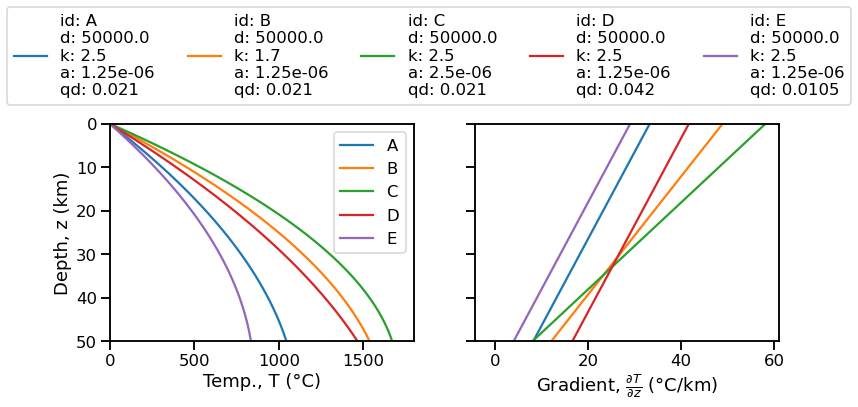

In [50]:
sns.set_context('talk')

fig = plt.figure(figsize=(12,4))
ax = fig.subplots(1,2,sharey=True)

for case in cases:
    ax[0].plot(geotherm(zz,case['d'],case['k'],case['qd'],case['a']),zz/1e3,'-',label=case['id'])
    ax[1].plot(1e3*np.diff(geotherm(zz,case['d'],case['k'],case['qd'],case['a']))/np.diff(zz),zz[:-1]/1e3,'-',
               label='\n'.join([('%s: %s')%(key,val) for key,val in case.items()])
              )

ax[0].set_ylabel('Depth, z (km)')
    
ax[0].set_xlabel('Temp., T (°C)')
ax[1].set_xlabel(r'Gradient, $\frac{\partial{T}}{\partial{z}}$ (°C/km)')
    
ax[0].legend()
ax[1].legend(bbox_to_anchor=(-0.15,1.05),loc='lower center',ncol=len(cases))


[aa.set_ylim([50,0]) for aa in ax.flat]
ax[0].set_xlim([0,1800]);

## 2 layer geotherm

In [51]:
def geotherm_twolayer(z,z1,z2,k,qd,a1,a2):
    """
    returns temp at depth (z) given thickness (d), conductivity (k), basal heat (qd) and internal heat (a)
    """
    
    if z<z1:
        return -a1/(2*k)*z**2 + (qd/k + (a2/k)*(z2-z1) + (a1*z1)/k)*z
    else:
        return -a2/(2*k)*z**2 + (qd/k + (a2*z2/k))*z + (a1-a2)/(2*k)*z1**2

In [52]:
case2_A = {'id':'A', 'z1':20e3, 'z2':15e3, 'k':2.5, 'qd':63e-3, 'a1': 4.2e-6, 'a2': 0.8e-6}

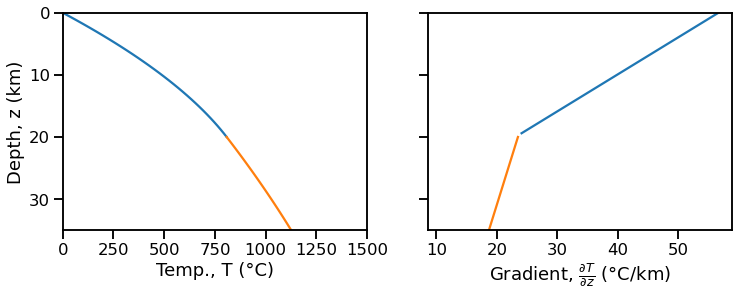

In [53]:
fig = plt.figure(figsize=(12,4))
ax = fig.subplots(1,2,sharey=True)

ax[0].plot([geotherm_twolayer(z,
                           case2_A['z1'],case2_A['z2'],
                           case2_A['k'],case2_A['qd'],
                           case2_A['a1'],case2_A['a2']) for z in zz[zz<=case2_A['z1']]],
        zz[zz<=case2_A['z1']]/1e3,'-')

ax[0].plot([geotherm_twolayer(z,
                           case2_A['z1'],case2_A['z2'],
                           case2_A['k'],case2_A['qd'],
                           case2_A['a1'],case2_A['a2']) for z in zz[zz>=case2_A['z1']]],
        zz[zz>=case2_A['z1']]/1e3,'-')

############

ax[1].plot(np.diff([1e3*geotherm_twolayer(z,case2_A['z1'],case2_A['z2'],
                                      case2_A['k'],case2_A['qd'],
                                      case2_A['a1'],
                                      case2_A['a2']) for z in zz[zz<=case2_A['z1']]])/np.diff(zz[zz<=case2_A['z1']]),
        zz[zz<=case2_A['z1']][:-1]/1e3,'-',color='tab:blue')

ax[1].plot(np.diff([1e3*geotherm_twolayer(z,case2_A['z1'],case2_A['z2'],
                                      case2_A['k'],case2_A['qd'],
                                      case2_A['a1'],
                                      case2_A['a2']) for z in zz[zz>=case2_A['z1']]])/np.diff(zz[zz>=case2_A['z1']]),
        zz[zz>=case2_A['z1']][:-1]/1e3,'-',color='tab:orange')

###########

ax[0].set_ylim([(case2_A['z1']+case2_A['z2'])/1e3,0])
ax[0].set_xlim([0,1500])

ax[0].set_ylabel('Depth, z (km)')   
ax[0].set_xlabel('Temp., T (°C)')
ax[1].set_xlabel(r'Gradient, $\frac{\partial{T}}{\partial{z}}$ (°C/km)');


## Heating and cooling
Scenario: Dike of width 2w, no internal heat generation, initial temperature T0, ignore latent heat<br>
initial conditions:<br>i) T=T0 at t=0 for -w <= x <= w<br>ii) T=0 at t=0 for |x|>=w

In [54]:
def tempdist(x,t,w,t0,k):
    """
    return temperature (degC) at given distance (x) and time (t) for 
    emplaced dike of width 2w at initial temp t0 and diffusivity of k
    """
    return (t0/2)*(sp.special.erf((w-x)/(2*np.sqrt(k*t)))+sp.special.erf((w+x)/(2*np.sqrt(k*t))))

In [55]:
days = [dt.timedelta(days=t).total_seconds() for t in range(8)] # 1 week in days
weeks = [dt.timedelta(weeks=t).total_seconds() for t in range(1,53)] # 1 year in weeks
years = [dt.timedelta(days=t*365.25).total_seconds() for t in range(1,101)] # 100 years

/var/folders/4x/7_b6jg990cddzczby4ws_dbh0000gq/T/ipykernel_53539/802089117.py:6: RuntimeWarning: divide by zero encountered in true_divide
  return (t0/2)*(sp.special.erf((w-x)/(2*np.sqrt(k*t)))+sp.special.erf((w+x)/(2*np.sqrt(k*t))))


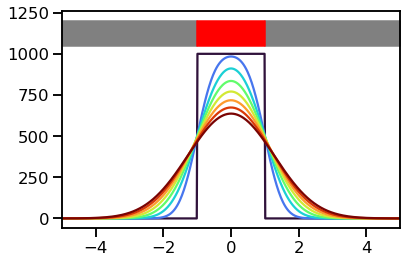

In [56]:
w = 1 # meter half-width
t0 = 1000 # initial temp
k = 1e-6 # diffusivity

xx = np.linspace(-10,10,1000)
cmap = plt.cm.turbo(np.linspace(0,1,len(days)))

fig = plt.figure()
ax = fig.subplots(1,1)

for tt,cc in zip(days,cmap):
    ax.plot(xx,tempdist(xx,tt,w,t0,k),'-',color=cc)

ax.set_xlim([-5,5])

# getting fancy
ax.fill_between(xx[(xx<-w)&(xx>ax.get_xlim()[0])],
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+200),
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>w)&(xx<ax.get_xlim()[1])],
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+200),
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>-w)&(xx<w)],
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+200),
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+50),
                 color='red', clip_on=True)


fig.tight_layout();

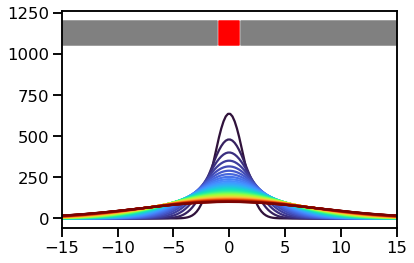

In [58]:
w = 1 # meter half-width
t0 = 1000 # initial temp
k = 1e-6 # diffusivity

xx = np.linspace(-100,100,1000)
cmap = plt.cm.turbo(np.linspace(0,1,len(weeks)))

fig = plt.figure()
ax = fig.subplots(1,1)

for tt,cc in zip(weeks,cmap):
    ax.plot(xx,tempdist(xx,tt,w,t0,k),'-',color=cc)
ax.set_xlim([-15,15])


# getting fancy
ax.fill_between(xx[(xx<-w)&(xx>ax.get_xlim()[0])],
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+200),
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>w)&(xx<ax.get_xlim()[1])],
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+200),
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(t0+50),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>-w)&(xx<w)],
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+200),
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(t0+50),
                 color='red', clip_on=True)

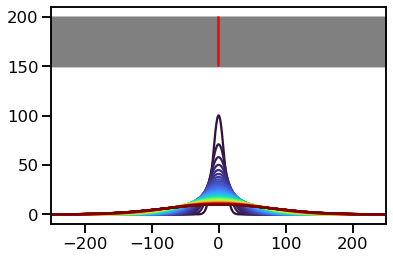

In [59]:
w = 1 # meter half-width
t0 = 1000 # initial temp
k = 1e-6 # diffusivity

xx = np.linspace(-250,250,10000)
cmap = plt.cm.turbo(np.linspace(0,1,len(years)))

fig = plt.figure()
ax = fig.subplots(1,1)

for tt,cc in zip(years,cmap):
    ax.plot(xx,tempdist(xx,tt,w,t0,k),'-',color=cc)
ax.set_xlim([-250,250])

# getting fancy
ax.fill_between(xx[(xx<-w)&(xx>ax.get_xlim()[0])],
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(200),
                 np.ones_like(xx[(xx<-w)&(xx>ax.get_xlim()[0])])*(150),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>w)&(xx<ax.get_xlim()[1])],
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(200),
                 np.ones_like(xx[(xx>w)&(xx<ax.get_xlim()[1])])*(150),
                 color='grey', clip_on=True)
ax.fill_between(xx[(xx>-w)&(xx<w)],
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(200),
                 np.ones_like(xx[(xx>-w)&(xx<w)])*(150),
                 color='red', clip_on=True)